In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train Data --> Exploratory Data Analysis and Data Pre-processing

In [2]:
df_train = pd.read_excel(r"140442_330428_bundle_archive\Data_Train.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [5]:
df_train.shape

(10683, 11)

In [6]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df_train.corr()

,Price
Price,1.0


In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 55m      1
33h 45m      1
3h 25m       1
30h 15m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
df_train.dropna(inplace = True)

In [13]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_train.shape

(10682, 11)

# EDA

In [15]:
df_train["journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [16]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day'],
      dtype='object')

In [17]:
df_train["journey_month"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [18]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month'],
      dtype='object')

In [19]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  journey_day      10682 non-null  int64 
 12  journey_month    10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [21]:
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  journey_day      10682 non-null  int64 
 11  journey_month    10682 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


In [23]:
# Departure Time

df_train["dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

df_train["dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  journey_day      10682 non-null  int64 
 11  journey_month    10682 non-null  int64 
 12  dep_hour         10682 non-null  int64 
 13  dep_min          10682 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.2+ MB


In [25]:
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   journey_day      10682 non-null  int64 
 10  journey_month    10682 non-null  int64 
 11  dep_hour         10682 non-null  int64 
 12  dep_min          10682 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [27]:
# Arrival time

df_train["arrival_hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour

df_train["arrival_min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   journey_day      10682 non-null  int64 
 10  journey_month    10682 non-null  int64 
 11  dep_hour         10682 non-null  int64 
 12  dep_min          10682 non-null  int64 
 13  arrival_hour     10682 non-null  int64 
 14  arrival_min      10682 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [29]:
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   journey_day      10682 non-null  int64 
 9   journey_month    10682 non-null  int64 
 10  dep_hour         10682 non-null  int64 
 11  dep_min          10682 non-null  int64 
 12  arrival_hour     10682 non-null  int64 
 13  arrival_min      10682 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


In [31]:
# Exploring Duration Column

duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:       #to check whether duration contains hours or mins?
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"      #Adds 0 mins
        else:
            duration[i] = "0h " + duration[i]     #Adds 0 hour

            
duration_hour = []
duration_mins = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))      #Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))     #Extracting mins from duration

In [32]:
df_train["duration_hours"] = duration_hour
df_train["duration_mins"] = duration_mins

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   journey_day      10682 non-null  int64 
 9   journey_month    10682 non-null  int64 
 10  dep_hour         10682 non-null  int64 
 11  dep_min          10682 non-null  int64 
 12  arrival_hour     10682 non-null  int64 
 13  arrival_min      10682 non-null  int64 
 14  duration_hours   10682 non-null  int64 
 15  duration_mins    10682 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 1.4+ MB


In [34]:
df_train.drop("Duration", axis = 1, inplace = True)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int64 
 8   journey_month    10682 non-null  int64 
 9   dep_hour         10682 non-null  int64 
 10  dep_min          10682 non-null  int64 
 11  arrival_hour     10682 non-null  int64 
 12  arrival_min      10682 non-null  int64 
 13  duration_hours   10682 non-null  int64 
 14  duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


# Pre-processing Categorical Data

### Airline

In [36]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

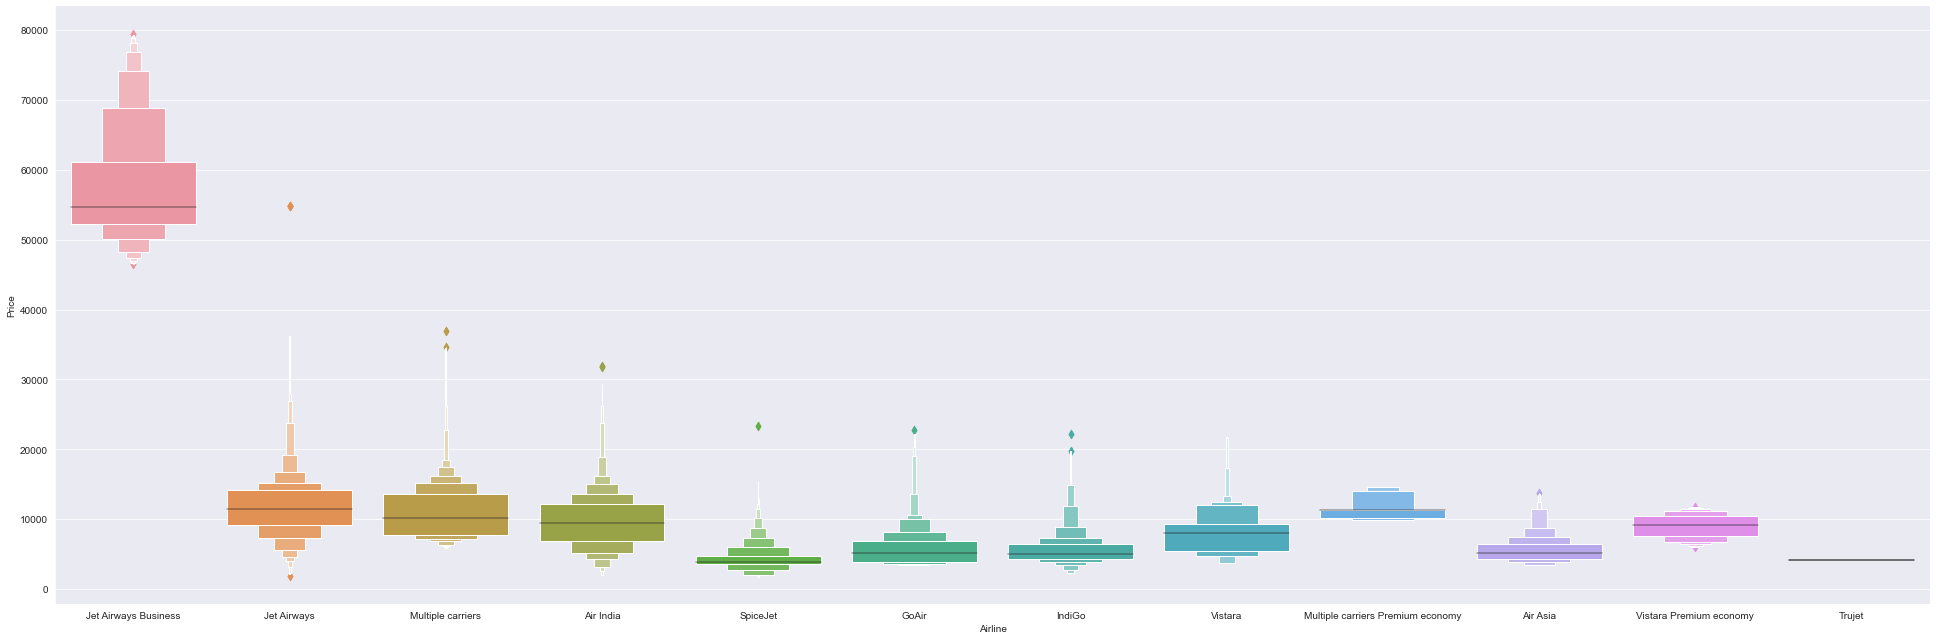

In [37]:
%matplotlib inline
sns.set_style(style = "darkgrid")
# plt.figure(figsize = (10,6))
sns.catplot(x = "Airline", y = "Price", data = df_train.sort_values("Price", ascending = False), kind = "boxen", height = 9, aspect = 3)

In [38]:
# Performing onehot encoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source

In [39]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

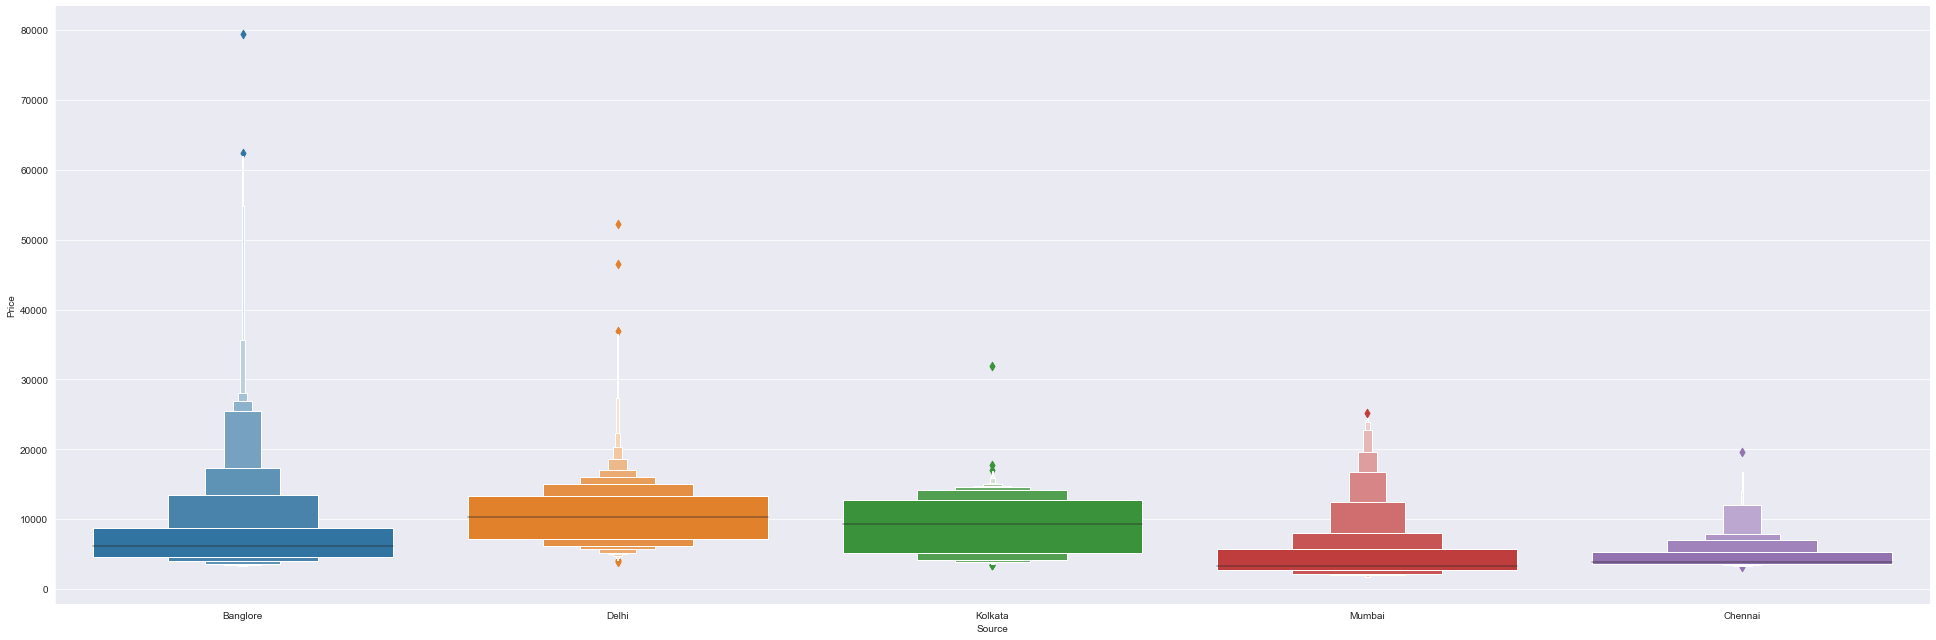

In [40]:
sns.catplot(x = "Source", y = "Price", data = df_train.sort_values("Price", ascending = False), kind = "boxen", height = 9, aspect = 3)

In [41]:
Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int64 
 8   journey_month    10682 non-null  int64 
 9   dep_hour         10682 non-null  int64 
 10  dep_min          10682 non-null  int64 
 11  arrival_hour     10682 non-null  int64 
 12  arrival_min      10682 non-null  int64 
 13  duration_hours   10682 non-null  int64 
 14  duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


### Destination

In [43]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [44]:
Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [45]:
df_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [46]:
df_train["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [47]:
df_train["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [48]:
df_train["Additional_Info"].value_counts("No info")

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
Red-eye flight                  0.000094
2 Long layover                  0.000094
1 Short layover                 0.000094
Name: Additional_Info, dtype: float64

### Dropping Route and Additional_Info

In [49]:
#  Route and Total_Stops are doing the same thing
#  In Additional_Info in majority cases No info is presents

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   journey_day     10682 non-null  int64 
 6   journey_month   10682 non-null  int64 
 7   dep_hour        10682 non-null  int64 
 8   dep_min         10682 non-null  int64 
 9   arrival_hour    10682 non-null  int64 
 10  arrival_min     10682 non-null  int64 
 11  duration_hours  10682 non-null  int64 
 12  duration_mins   10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Label encoding the Total_Stops as this is Ordinal Data

In [51]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

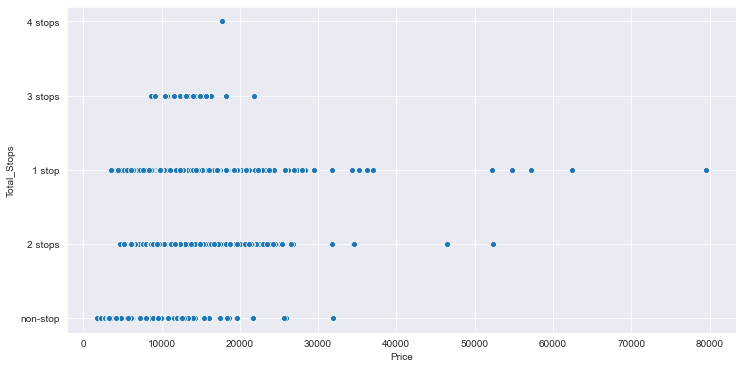

In [52]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Price", y = "Total_Stops", data = df_train)

In [53]:
# Performing label encoding as Total_Stops is an ordinal category
# Contrary to the beliefs the price is increasing with the increasing stops 

df_train.replace({
    "non-stop" : 0,
    "1 stop" : 1,
    "2 stops" : 2,
    "3 stops" : 3,
    "4 stops" : 4
}, inplace = True)

In [54]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### Concatinating Nominal Data converted through OneHot Encoding

In [55]:
# Concatenate the Data Frame ------> df_train + Airline + Source + Destination

df_train_concat = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [56]:
df_train_concat.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df_train_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Airline                                    10682 non-null  object
 1   Source                                     10682 non-null  object
 2   Destination                                10682 non-null  object
 3   Total_Stops                                10682 non-null  int64 
 4   Price                                      10682 non-null  int64 
 5   journey_day                                10682 non-null  int64 
 6   journey_month                              10682 non-null  int64 
 7   dep_hour                                   10682 non-null  int64 
 8   dep_min                                    10682 non-null  int64 
 9   arrival_hour                               10682 non-null  int64 
 10  arrival_min                       

In [58]:
df_train_concat.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [59]:
df_train_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   journey_day                                10682 non-null  int64
 3   journey_month                              10682 non-null  int64
 4   dep_hour                                   10682 non-null  int64
 5   dep_min                                    10682 non-null  int64
 6   arrival_hour                               10682 non-null  int64
 7   arrival_min                                10682 non-null  int64
 8   duration_hours                             10682 non-null  int64
 9   duration_mins                              10682 non-null  int64
 10  Airline_Air India                          106

In [60]:
df_train_concat.shape

(10682, 30)

# Test Data --> Exploratory Data Analysis and Data Pre-processing

In [61]:
df_test = pd.read_excel(r"140442_330428_bundle_archive\Test_set.xlsx")

In [63]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [66]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [67]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [68]:
df_test.shape

(2671, 10)

### EDA

In [69]:
df_test["journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.day
df_test["journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

df_test["dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

df_test["arrival_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["arrival_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)


# Exploring Duration Column

duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:       #to check whether duration contains hours or mins?
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"      #Adds 0 mins
        else:
            duration[i] = "0h " + duration[i]     #Adds 0 hour

            
duration_hour = []
duration_mins = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0]))      #Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))     #Extracting mins from duration
    
df_test["duration_hours"] = duration_hour
df_test["duration_mins"] = duration_mins

df_test.drop("Duration", axis = 1, inplace = True)


# Performing onehot encoding

Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

Source = df_test[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

#  Route and Total_Stops are doing the same thing
#  In Additional_Info in majority cases No info is presents

df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Performing label encoding as Total_Stops is an ordinal category
# Contrary to the beliefs the price is increasing with the increasing stops 

df_test.replace({
    "non-stop" : 0,
    "1 stop" : 1,
    "2 stops" : 2,
    "3 stops" : 3,
    "4 stops" : 4
}, inplace = True)

# Concatenate the Data Frame ------> df_test + Airline + Source + Destination

df_test_concat = pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test_concat.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [70]:
df_test_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   journey_day                                2671 non-null   int64
 2   journey_month                              2671 non-null   int64
 3   dep_hour                                   2671 non-null   int64
 4   dep_min                                    2671 non-null   int64
 5   arrival_hour                               2671 non-null   int64
 6   arrival_min                                2671 non-null   int64
 7   duration_hours                             2671 non-null   int64
 8   duration_mins                              2671 non-null   int64
 9   Airline_Air India                          2671 non-null   uint8
 10  Airline_GoAir                              2671 

In [71]:
df_test_concat.shape

(2671, 28)

## Feature Selection

Feature Selection Methods:

1. Heatmap
2. feature_importance_
3. SelectKBest

In [72]:
df_train_concat.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [73]:
X = df_train_concat.loc[: , ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [74]:
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   journey_day                                10682 non-null  int64
 2   journey_month                              10682 non-null  int64
 3   dep_hour                                   10682 non-null  int64
 4   dep_min                                    10682 non-null  int64
 5   arrival_hour                               10682 non-null  int64
 6   arrival_min                                10682 non-null  int64
 7   duration_hours                             10682 non-null  int64
 8   duration_mins                              10682 non-null  int64
 9   Airline_Air India                          10682 non-null  uint8
 10  Airline_GoAir                              106

In [76]:
y = df_train_concat["Price"]

In [78]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

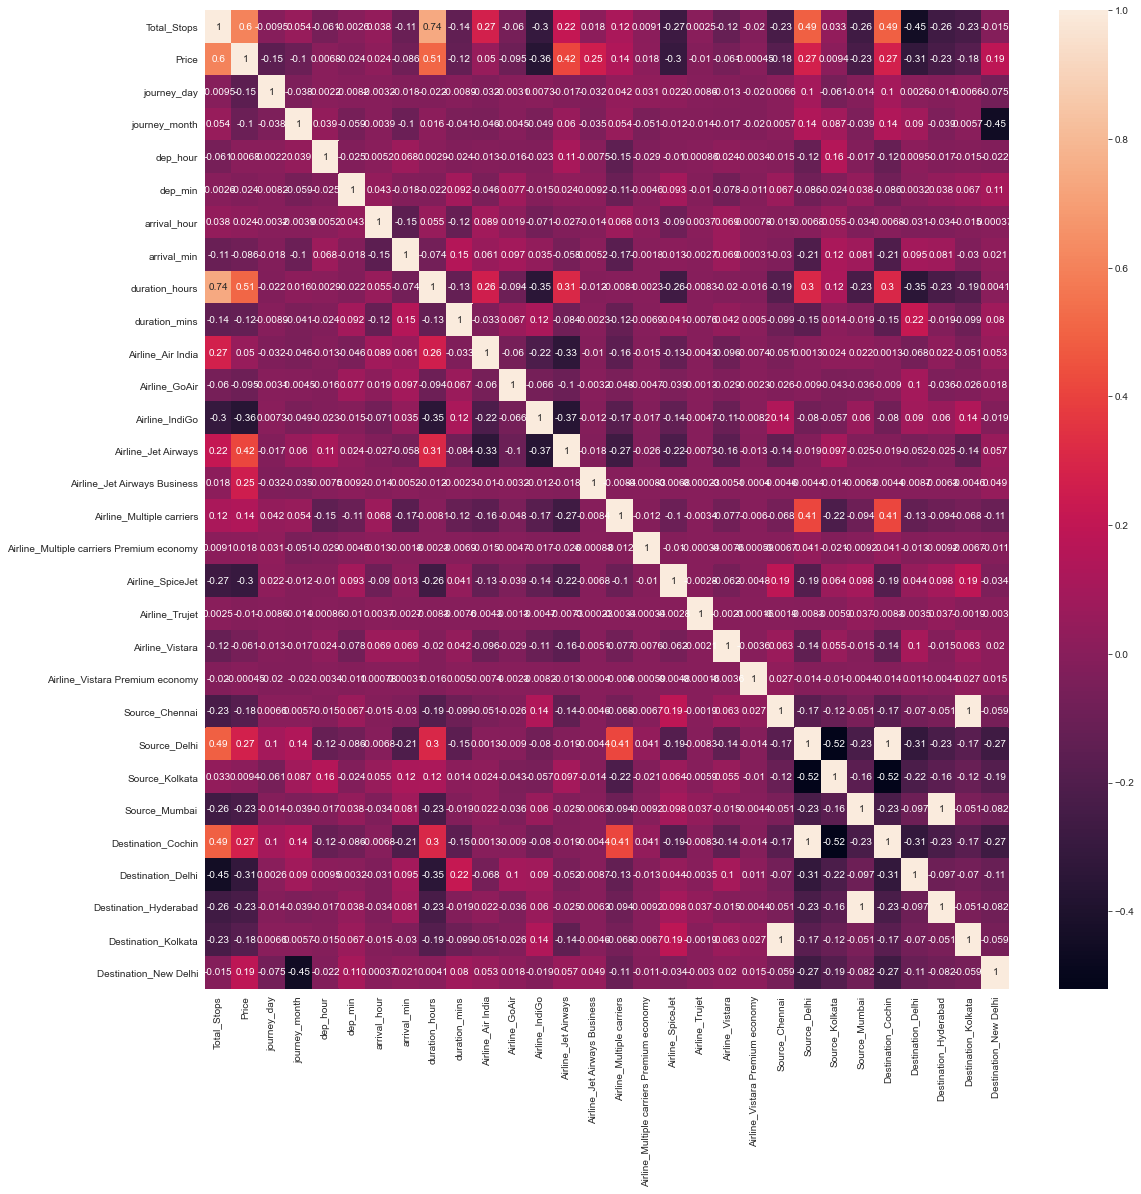

In [82]:
# Correlation between dependent and independent attributes

plt.figure(figsize = (18, 18))
sns.heatmap(df_train_concat.corr(), annot = True)

In [86]:
df_train_concat.corr()["Price"].sort_values(ascending = False)

Price                                        1.000000
Total_Stops                                  0.603897
duration_hours                               0.508778
Airline_Jet Airways                          0.416124
Source_Delhi                                 0.270676
Destination_Cochin                           0.270676
Airline_Jet Airways Business                 0.253303
Destination_New Delhi                        0.189777
Airline_Multiple carriers                    0.139793
Airline_Air India                            0.050432
arrival_hour                                 0.024244
Airline_Multiple carriers Premium economy    0.017650
Source_Kolkata                               0.009358
dep_hour                                     0.006799
Airline_Vistara Premium economy             -0.000454
Airline_Trujet                              -0.010381
dep_min                                     -0.024458
Airline_Vistara                             -0.060654
arrival_min                 

In [87]:
# Finding Important features using Extra Tree Regressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [88]:
# Important Features Found
selection.feature_importances_

array([2.47379874e-01, 1.42437172e-01, 5.48355176e-02, 2.43720949e-02,
       2.17368781e-02, 2.76367068e-02, 1.98642450e-02, 9.72773496e-02,
       1.75647572e-02, 9.94299196e-03, 1.71849700e-03, 1.85645936e-02,
       1.41949935e-01, 6.73484062e-02, 1.83858884e-02, 8.98629270e-04,
       3.26795904e-03, 1.11063742e-04, 5.22120690e-03, 8.42123437e-05,
       4.77130018e-04, 1.18303215e-02, 3.07399218e-03, 7.51259999e-03,
       8.97940773e-03, 1.52094972e-02, 6.96074753e-03, 4.02190186e-04,
       2.49561349e-02])

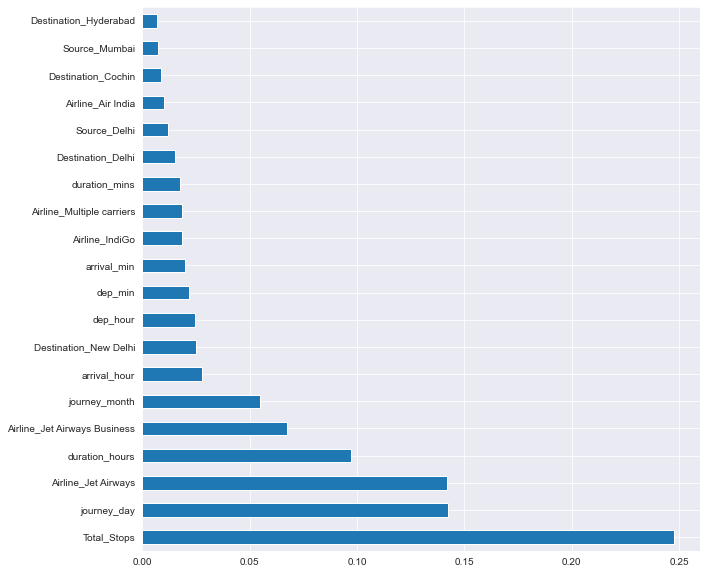

In [90]:
# Plotting Important Features

plt.figure(figsize = (10,10))
imp_features = pd.Series(selection.feature_importances_, index = X.columns)
imp_features.nlargest(20).plot(kind = "barh")

# Fitting Model using Random Forest Regressor

### Steps:

1. Split dataset into train and test set in order to perform prediction w.r.t X_test 
2. If needed do scaling of data
    - Scaling is not done in Random Forest Regressor Method
3. Import Model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME score
7. Plot graph

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [93]:
from sklearn.ensemble import RandomForestRegressor
reg_train = RandomForestRegressor()
reg_train.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
y_pred = reg_train.predict(X_test)

In [95]:
reg_train.score(X_train, y_train)

0.955007756480427

In [96]:
reg_train.score(X_test, y_test)

0.8033980066813345

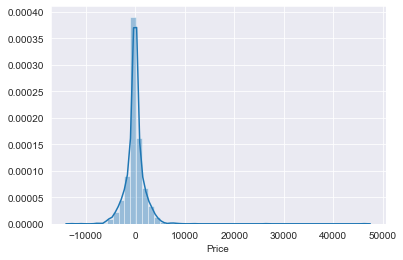

In [97]:
sns.distplot(y_test - y_pred)

Text(0, 0.5, 'y_pred')

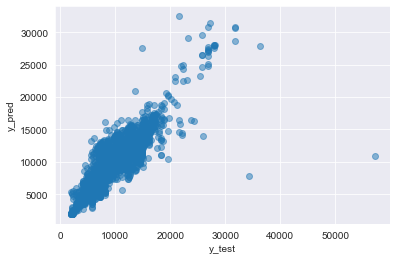

In [98]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [99]:
from sklearn import metrics

In [104]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  1164.8550794723476


In [105]:
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  4010862.8310425626


In [107]:
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Square Error:  2002.7138664928054


In [108]:
metrics.r2_score(y_test, y_pred)

0.8033980066813345

# Hyper Parameter Tuning

1. Choose following methods for Hyper Parameter Tuning
    - Randomized Search CV ---> Fast
    - Grid Search CV
    
2. Assign hyper-parameters in form of dictionery
3. Fit the model
4. Check best parameters and best score



In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
#  Randomized search CV

# Number of Trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in Tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum numbers of samples required to split a node
min_sample_split = [2, 5, 10, 15, 100]

# Minimum numbers of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [116]:
# Create the Random grid

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_sample_split,
    "min_samples_leaf": min_samples_leaf
}

In [117]:
# Random search of parameters using 5 fold cross validation
# Search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_train, param_distributions = random_grid, scoring = "neg_mean_squared_error", n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [118]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [120]:
prediction = rf_random.predict(X_test)

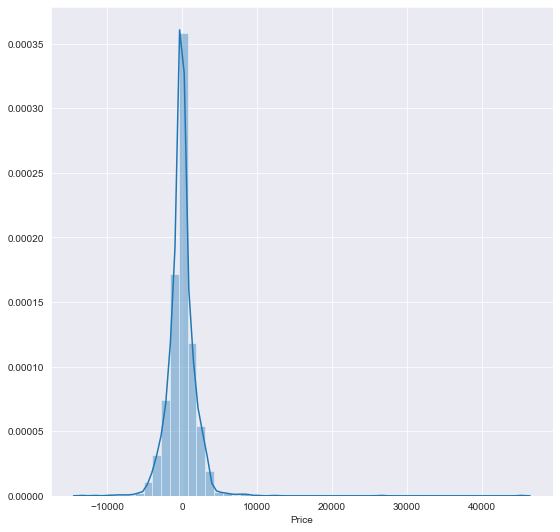

In [121]:
plt.figure(figsize = (9,9))
sns.distplot(y_test - prediction)

Text(0, 0.5, 'y_pred')

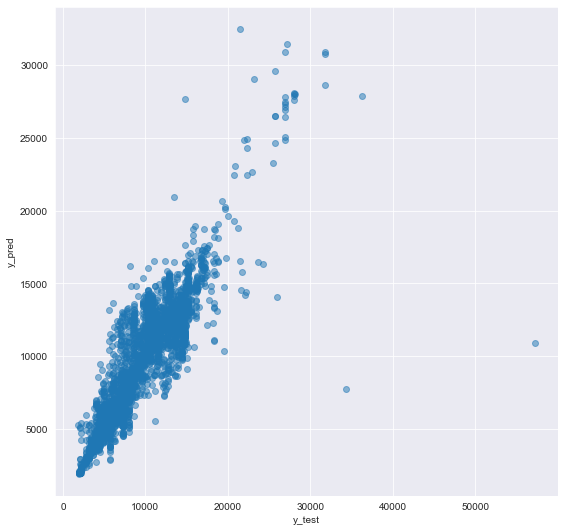

In [122]:
plt.figure(figsize = (9,9))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [123]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, prediction))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, prediction))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error:  1163.637696587631
Mean Squared Error:  3772331.797845314
Root Mean Square Error:  1942.2491595686981


## Save the model to re-use it again

In [125]:
# Saving the model

import pickle

# open a file at the location you want to save the data at

file = open("flight_fare_rf.pkl", "wb")

open

# dump information to that file

pickle.dump(rf_random, file)

In [126]:
# Reusing the model again for the example

model = open("flight_fare_rf.pkl" , "rb")
forest = pickle.load(model)

In [127]:
y_prediction = forest.predict(X_test)

In [128]:
metrics.r2_score(y_test, y_prediction)

0.8150901733223836